In [2]:
import pandas as pd
import numpy as np

In [3]:
bags_and_cases = pd.read_csv('../inputCSVs/bags_and_cases.csv')

In [4]:
bags_and_cases.shape

(42632, 4)

In [72]:
# Check the missing values in df
null_values=bags_and_cases.isna().sum()


In [73]:
null_values

product_Id    0
rating        0
reviews       0
dtype: int64

In [74]:
bags_and_cases.shape

(42632, 3)

In [75]:
!pip3 install gensim
!pip3 install pyldavis
!pip3 install nltk
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install textblob
!pip3 install spacy
!python3 -m spacy download en 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-co

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 13.9 MB 229 kB/s            


You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [76]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samridhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

In [78]:
# a function that provides the most frequent words with count on a plot
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  print(d)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [79]:
bags_and_cases['reviews']

0        This case looks nice and has plenty of pockets for all the other stuff you have to carry around .But , if you 're using it for something other than back and forth to the office or have a thinner l...
1        I bought this one few months back for my Toshiba laptop ... . . the case is quite strong thou a lill small for my 15 '' Toshiba Satellite ... but on the other side this bag is quite strong and stu...
2        The pic on this product does no justice to the real thing .Its very good looking -LRB- BLACK synthetic with a sheen -RRB- , and well designed .Isnt one of those huge contraptions that people carry...
3        I have an HP Pavilion ze5385us -LRB- ze5300 series -RRB- and this thing fits my laptop perfectly .The front pocket can fit the power supply , an infrared mouse , an infrared transmitter , and a he...
4        I 'm very happy with the bag , it exceeded my expectations .My 15 '' Toshiba satellite fits perfectly , I 'm using one of the adjustable paddings to better

       word   count
11      the  189102
20        ,  148622
31        a  114941
4       and  114493
24       it  112842
101       I   93174
16       to   91100
35       is   80012
9       for   66089
7        of   58539
50       my   52623
100       .   49783
49     this   48801
122    that   42583
40       in   42154
258      .I   40981
115     bag   36098
66       on   34777
1      case   32821
131    with   32753
114     but   31520
33   laptop   30349
60      was   28634
183    .The   27451
37      not   27308
15     have   27278
300     n't   26322
14      you   25600
96       's   23514
254     .It   23220


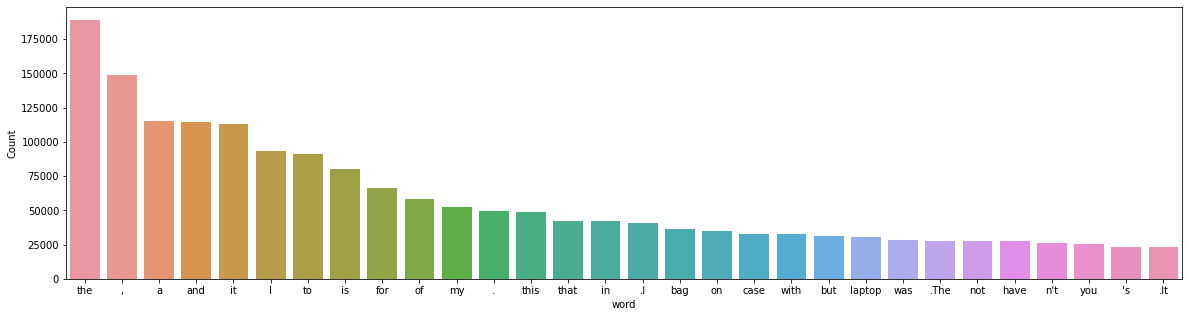

In [80]:
freq_words(bags_and_cases['reviews'])

In [81]:
# replace "n't" with " not"
bags_and_cases['reviews']= bags_and_cases['reviews'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
bags_and_cases['reviews'] = bags_and_cases['reviews'].str.replace("[^a-zA-Z#]", " ")

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/193494026.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  bags_and_cases['reviews'] = bags_and_cases['reviews'].str.replace("[^a-zA-Z#]", " ")


In [82]:
bags_and_cases['reviews']

0        This case looks nice and has plenty of pockets for all the other stuff you have to carry around  But   if you  re using it for something other than back and forth to the office or have a thinner l...
1        I bought this one few months back for my Toshiba laptop         the case is quite strong thou a lill small for my       Toshiba Satellite     but on the other side this bag is quite strong and stu...
2        The pic on this product does no justice to the real thing  Its very good looking  LRB  BLACK synthetic with a sheen  RRB    and well designed  Isnt one of those huge contraptions that people carry...
3        I have an HP Pavilion ze    us  LRB  ze     series  RRB  and this thing fits my laptop perfectly  The front pocket can fit the power supply   an infrared mouse   an infrared transmitter   and a he...
4        I  m very happy with the bag   it exceeded my expectations  My       Toshiba satellite fits perfectly   I  m using one of the adjustable paddings to better

       word   count
11      the  189246
98        I  137737
30        a  115028
4       and  114739
23       it  112956
16       to   91284
34       is   80025
9       for   66104
7        of   58580
36      not   53677
49       my   52631
48     this   48812
39       in   42858
116    that   42591
109     bag   36285
65       on   35432
155     The   33750
1      case   33020
125    with   32763
108     but   31536
32   laptop   30618
59      was   28638
241      It   27478
15     have   27297
14      you   25615
94        s   23886
364      as   20629
260      so   17698
151    very   17695
351    like   17289


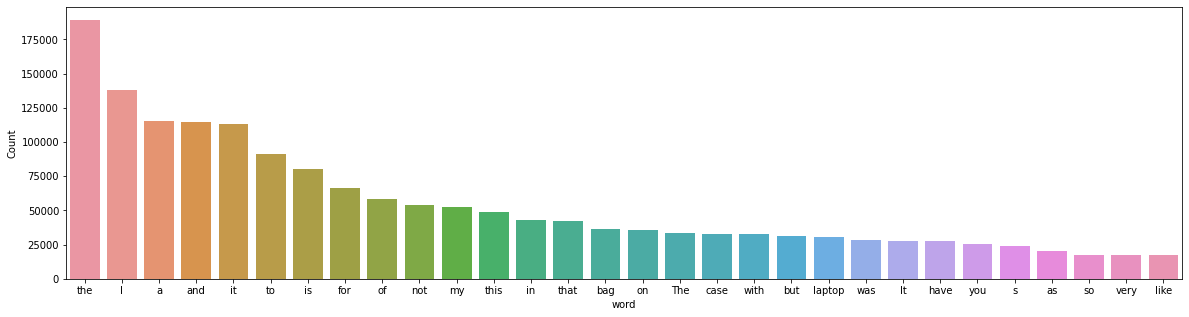

In [83]:
freq_words(bags_and_cases['reviews'])

#### Checking stopwords in the reviews

In [84]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [85]:
# Checking the number of stopwords in each review
bags_and_cases['stopwords'] = bags_and_cases['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
bags_and_cases[['reviews','stopwords']].head()

,reviews,stopwords
0,This case looks nice and has plenty of pockets for all the other stuff you have to carry around But if you re using it for something other than back and forth to the office or have a thinner l...,76
1,I bought this one few months back for my Toshiba laptop the case is quite strong thou a lill small for my Toshiba Satellite but on the other side this bag is quite strong and stu...,44
2,The pic on this product does no justice to the real thing Its very good looking LRB BLACK synthetic with a sheen RRB and well designed Isnt one of those huge contraptions that people carry...,26
3,I have an HP Pavilion ze us LRB ze series RRB and this thing fits my laptop perfectly The front pocket can fit the power supply an infrared mouse an infrared transmitter and a he...,38
4,I m very happy with the bag it exceeded my expectations My Toshiba satellite fits perfectly I m using one of the adjustable paddings to better secure the notebook It will accomodate ...,32


In [86]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [87]:
bags_and_cases['reviews']

0        This case looks nice and has plenty of pockets for all the other stuff you have to carry around  But   if you  re using it for something other than back and forth to the office or have a thinner l...
1        I bought this one few months back for my Toshiba laptop         the case is quite strong thou a lill small for my       Toshiba Satellite     but on the other side this bag is quite strong and stu...
2        The pic on this product does no justice to the real thing  Its very good looking  LRB  BLACK synthetic with a sheen  RRB    and well designed  Isnt one of those huge contraptions that people carry...
3        I have an HP Pavilion ze    us  LRB  ze     series  RRB  and this thing fits my laptop perfectly  The front pocket can fit the power supply   an infrared mouse   an infrared transmitter   and a he...
4        I  m very happy with the bag   it exceeded my expectations  My       Toshiba satellite fits perfectly   I  m using one of the adjustable paddings to better

#### Checking punctuation present in the reviews

In [88]:
import string
nltk.download('punkt')
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

bags_and_cases['punctuation'] = bags_and_cases['reviews'].apply(lambda x: count_punctuation(x))


[nltk_data] Downloading package punkt to /Users/samridhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
bags_and_cases[['reviews','punctuation']]

,reviews,punctuation
0,This case looks nice and has plenty of pockets for all the other stuff you have to carry around But if you re using it for something other than back and forth to the office or have a thinner l...,0
1,I bought this one few months back for my Toshiba laptop the case is quite strong thou a lill small for my Toshiba Satellite but on the other side this bag is quite strong and stu...,0
2,The pic on this product does no justice to the real thing Its very good looking LRB BLACK synthetic with a sheen RRB and well designed Isnt one of those huge contraptions that people carry...,0
3,I have an HP Pavilion ze us LRB ze series RRB and this thing fits my laptop perfectly The front pocket can fit the power supply an infrared mouse an infrared transmitter and a he...,0
4,I m very happy with the bag it exceeded my expectations My Toshiba satellite fits perfectly I m using one of the adjustable paddings to better secure the notebook It will accomodate ...,0
...,...,...
42627,The sleeve is much greater than I expected especially for so cheap It fits my # Macbook Air perfectly and has the perfect amount of pockets for everything I carry LRB even one for my i...,1
42628,I love this case I really wanted something stylish but protective and this is perfect I love that I can fit this in my backpack and that it has really nice padding The inside is lined with gr...,0
42629,First of all I used to write reviews for a variety of tech companies in the past but due to my work and school schedule have not been able to receive and review products for the past couple year...,3
42630,As the name implies this envelop shaped cover case x is made specifically to fit the MacBook Air but it also can be used for most other mini Laptops The elegantly designed case is ...,1


#### Checking hastags present in the review text

In [90]:
bags_and_cases['hastags'] = bags_and_cases['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
bags_and_cases['hastags'].sum()

7040

In [91]:
bags_and_cases.hastags.loc[bags_and_cases.hastags != 0].count()

3793

#### Checking numerics from the reviews

In [92]:
bags_and_cases['numerics'] = bags_and_cases['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
bags_and_cases['numerics'].sum()

0

#### Checking the words which are in uppercase, which may be significant

In [93]:
bags_and_cases['upper'] = bags_and_cases['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
bags_and_cases['reviews'][bags_and_cases['upper'] > 1].count()

31662

In [94]:
bags_and_cases['reviews']

0        This case looks nice and has plenty of pockets for all the other stuff you have to carry around  But   if you  re using it for something other than back and forth to the office or have a thinner l...
1        I bought this one few months back for my Toshiba laptop         the case is quite strong thou a lill small for my       Toshiba Satellite     but on the other side this bag is quite strong and stu...
2        The pic on this product does no justice to the real thing  Its very good looking  LRB  BLACK synthetic with a sheen  RRB    and well designed  Isnt one of those huge contraptions that people carry...
3        I have an HP Pavilion ze    us  LRB  ze     series  RRB  and this thing fits my laptop perfectly  The front pocket can fit the power supply   an infrared mouse   an infrared transmitter   and a he...
4        I  m very happy with the bag   it exceeded my expectations  My       Toshiba satellite fits perfectly   I  m using one of the adjustable paddings to better

#### Cleaning steps

In [95]:


# remove short words whose (length < 3)
bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing puctuations
bags_and_cases['reviews'] = bags_and_cases['reviews'].str.replace('[^\w\s]','')
bags_and_cases['reviews'].head()

# make entire review text lowercase
reviews = [r.lower() for r in bags_and_cases['reviews']]

# remove stopwords from the reviews
reviews = [remove_stopwords(r.split()) for r in reviews]




<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/1645673243.py:5: DeprecationWarning: invalid escape sequence \w
  bags_and_cases['reviews'] = bags_and_cases['reviews'].str.replace('[^\w\s]','')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/1645673243.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  bags_and_cases['reviews'] = bags_and_cases['reviews'].str.replace('[^\w\s]','')


In [96]:
bags_and_cases['reviews']

0        This case looks nice and has plenty pockets for all the other stuff you have carry around But you using for something other than back and forth the office have thinner laptop there just not enough...
1        bought this one few months back for Toshiba laptop the case quite strong thou lill small for Toshiba Satellite but the other side this bag quite strong and sturdy and compact too thinking that can...
2        The pic this product does justice the real thing Its very good looking LRB BLACK synthetic with sheen RRB and well designed Isnt one those huge contraptions that people carry The hand and shoulder...
3        have Pavilion LRB series RRB and this thing fits laptop perfectly The front pocket can fit the power supply infrared mouse infrared transmitter and headphone just fine There another large pocket i...
4        very happy with the bag exceeded expectations Toshiba satellite fits perfectly using one the adjustable paddings better secure the notebook will accomodate

         word  count
63        bag  36789
0        case  34659
14     laptop  31626
26        one  18103
254      like  17645
101       rrb  17282
168     would  17147
97        lrb  15850
189     great  14911
102      well  14692
137       fit  14236
73       good  11867
272  backpack  11328
117      fits  10953
721   macbook  10949
147       use  10614
179    really   9568
67       also   9451
18   computer   9247
240    sleeve   9032
6       carry   8784
37     little   8779
93    product   8740
2        nice   8348
28      cover   8177
676       get   8056
10       back   7654
136    pocket   7625
629      love   7363
4     pockets   7327
21     bought   7067
377      much   7047
246     strap   6633
74    quality   6617
91      price   6516


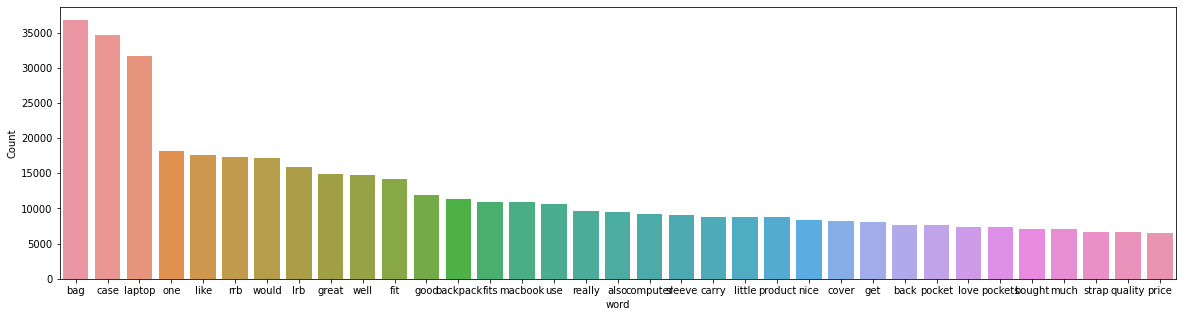

In [97]:
freq_words(reviews, 35)

In [98]:
!pip3 install -U spacy
!python3 -m spacy download en 
import spacy
# en_core_web_sm

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 13.9 MB 8.1 MB/s            


You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [99]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [100]:
import pandas as pd
stemmer = SnowballStemmer("english")
# reviews_3 = [stemmer.stem(plural) for plural in original_words]

def stemming_and_lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [105]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['bought', 'one', 'months', 'back', 'toshiba', 'laptop', 'case', 'quite', 'strong', 'thou', 'lill', 'small', 'toshiba', 'satellite', 'side', 'bag', 'quite', 'strong', 'sturdy', 'compact', 'thinking', 'also', 'put', 'files', 'documents', 'case', 'along', 'laptop', 'bag', 'pros', 'strong', 'good', 'quality', 'fabric', 'zippers', 'water', 'proof', 'light', 'right', 'size', 'smart', 'looking', 'toocons', 'wont', 'recommend', 'laptops', 'wont', 'carry', 'books', 'big', 'files', 'overall', 'think', 'good', 'bag', 'price']


In [106]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['bought', 'one', 'months', 'back', 'toshiba', 'laptop', 'case', 'quite', 'strong', 'thou', 'lill', 'small', 'toshiba', 'satellite', 'side', 'bag', 'quite', 'strong', 'sturdy', 'compact', 'thinking', 'also', 'put', 'files', 'documents', 'case', 'along', 'laptop', 'bag', 'pros', 'strong', 'good', 'quality', 'fabric', 'zippers', 'water', 'proof', 'light', 'right', 'size', 'smart', 'looking', 'toocons', 'wont', 'recommend', 'laptops', 'wont', 'carry', 'books', 'big', 'files', 'overall', 'think', 'good', 'bag', 'price']


56

In [107]:
reviews_2 = stemming_and_lemmatization(tokenized_reviews)
print(reviews_2[1])

['month', 'toshiba', 'laptop', 'case', 'strong', 'thou', 'side', 'bag', 'strong', 'sturdy', 'compact', 'thinking', 'file', 'document', 'case', 'laptop', 'bag', 'pro', 'strong', 'good', 'quality', 'fabric', 'zipper', 'water', 'proof', 'right', 'size', 'smart', 'toocon', 'laptop', 'book', 'big', 'file', 'good', 'bag', 'price']


In [108]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'along',
 'also',
 'back',
 'books',
 'bought',
 'carry',
 'documents',
 'files',
 'laptops',
 'light',
 'lill',
 'looking',
 'months',
 'one',
 'overall',
 'pros',
 'put',
 'quite',
 'recommend',
 'satellite',
 'small',
 'think',
 'toocons',
 'wont',
 'zippers'}

In [109]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
bags_and_cases['reviews'] = reviews_3

             word  count
34            bag  37361
0            case  36184
7          laptop  32020
120         great  14434
3          pocket  13812
41           good  13627
85            fit  12732
171      backpack  11049
67          strap  10269
55        product   9722
11       computer   9492
399       macbook   9031
201         small   8480
83            rrb   8296
149        sleeve   8138
19         little   8120
1            nice   7956
116   compartment   7540
58          thing   7308
1022        color   6678
42        quality   6625
53          price   6456
170          time   6359
25           side   6157
131           lot   6104
553         cover   6065
93            use   5865
52            big   5801
360           top   5651
371          love   5598
122          room   5526
283          inch   5424
44         zipper   5379
125          item   5353
106       perfect   5349


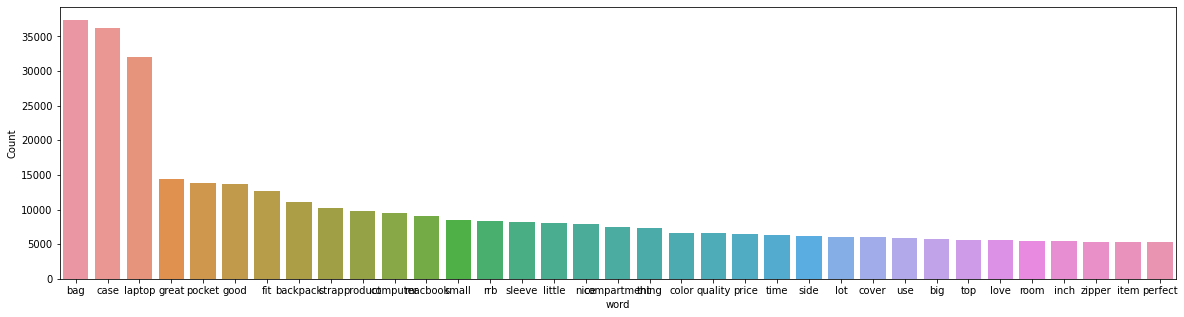

In [110]:
freq_words(bags_and_cases['reviews'], 35)

#### Removing any URLs in the reviews

In [111]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)



# remove all urls from df
import re
import string

bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(lambda x: remove_url(x))

#### Removing html tags from the text

In [112]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)



# remove all html tags from df
bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(lambda x: remove_html(x))

#### Removing emojis and emoticons

In [113]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove all emojis from df
bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(lambda x: remove_emoji(x))

In [114]:
!pip3 install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
    return emoticon_pattern.sub(r'', text)



# bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(lambda x: remove_emoticons(x))

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/2725549597.py:7: DeprecationWarning: invalid escape sequence \(
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/2725549597.py:7: DeprecationWarning: invalid escape sequence \|
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/2725549597.py:7: DeprecationWarning: invalid escape sequence \)
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [115]:
# correction of the words spelling - not done at it is taking  lot of time to run
# from textblob import TextBlob
# bags_and_cases['reviews'].apply(lambda x: str(TextBlob(x).correct()))

             word  count
34            bag  37361
0            case  36184
7          laptop  32020
120         great  14434
3          pocket  13812
41           good  13627
85            fit  12732
171      backpack  11049
67          strap  10269
55        product   9722
11       computer   9492
399       macbook   9031
201         small   8480
83            rrb   8296
149        sleeve   8138
19         little   8120
1            nice   7956
116   compartment   7540
58          thing   7308
1022        color   6678
42        quality   6625
53          price   6456
170          time   6359
25           side   6157
131           lot   6104
553         cover   6065
93            use   5865
52            big   5801
360           top   5651
371          love   5598


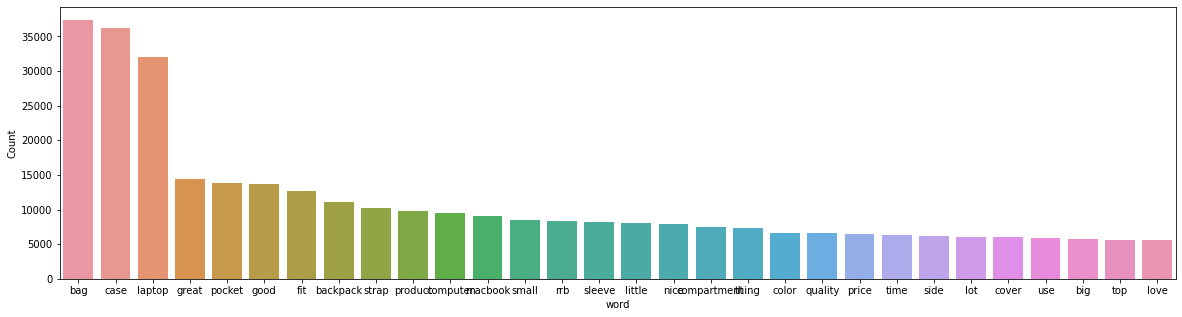

In [116]:
freq_words(bags_and_cases['reviews'])

In [117]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/2170350517.py:4: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_34613/2170350517.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [118]:


bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(round1)
bags_and_cases['reviews']



0        case nice plenty pocket stuff office thin laptop enough padding protect computer rubbing son fall thin laptop constant rubbing screen touchpad control little white mark blame computer design paddi...
1        month toshiba laptop case strong thou side bag strong sturdy compact thinking file document case laptop bag pro strong good quality fabric zipper water proof right size smart toocon laptop book bi...
2        pic product justice real thing good black synthetic sheen huge contraption people hand shoulder strap delicious padding adequate space large computer zip drive cable magazine note bulky file text ...
3        pavilion rrb thing laptop front pocket fit power supply infrared mouse infrared transmitter headphone fine large pocket use store cdrom inside pocket large enough hold box business card heache sid...
4                            happy bag expectation satellite adjustable padding secure notebook accomodate thick laptop thin bag enough compartment big exterior one

             word  count
34            bag  37361
0            case  36184
7          laptop  32020
120         great  14434
3          pocket  13812
41           good  13627
85            fit  12732
171      backpack  11049
67          strap  10269
55        product   9722
11       computer   9492
399       macbook   9031
201         small   8480
83            rrb   8296
149        sleeve   8138
19         little   8120
1            nice   7956
116   compartment   7540
58          thing   7308
1022        color   6678
42        quality   6625
53          price   6456
170          time   6359
25           side   6157
131           lot   6104
553         cover   6065
93            use   5865
52            big   5801
360           top   5651
371          love   5598


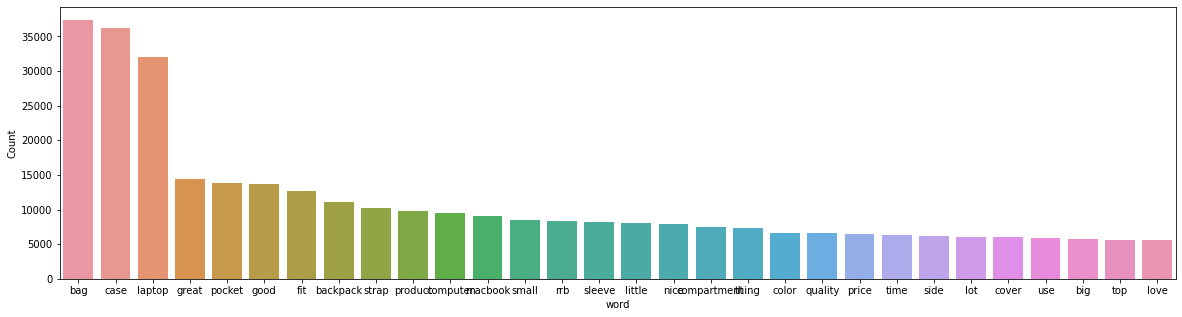

In [119]:
freq_words(bags_and_cases['reviews'])

In [120]:


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)



In [121]:


bags_and_cases['reviews'] = bags_and_cases['reviews'].apply(round2)
bags_and_cases['reviews']



0        case nice plenty pocket stuff office thin laptop enough padding protect computer rubbing son fall thin laptop constant rubbing screen touchpad control little white mark blame computer design paddi...
1        month toshiba laptop case strong thou side bag strong sturdy compact thinking file document case laptop bag pro strong good quality fabric zipper water proof right size smart toocon laptop book bi...
2        pic product justice real thing good black synthetic sheen huge contraption people hand shoulder strap delicious padding adequate space large computer zip drive cable magazine note bulky file text ...
3        pavilion rrb thing laptop front pocket fit power supply infrared mouse infrared transmitter headphone fine large pocket use store cdrom inside pocket large enough hold box business card heache sid...
4                            happy bag expectation satellite adjustable padding secure notebook accomodate thick laptop thin bag enough compartment big exterior one

In [122]:
bags_and_cases['word_count'] = bags_and_cases['reviews'].apply(lambda x: len(str(x).split(" ")))
bags_and_cases[['reviews','word_count']].head()

,reviews,word_count
0,case nice plenty pocket stuff office thin laptop enough padding protect computer rubbing son fall thin laptop constant rubbing screen touchpad control little white mark blame computer design paddi...,37
1,month toshiba laptop case strong thou side bag strong sturdy compact thinking file document case laptop bag pro strong good quality fabric zipper water proof right size smart toocon laptop book bi...,36
2,pic product justice real thing good black synthetic sheen huge contraption people hand shoulder strap delicious padding adequate space large computer zip drive cable magazine note bulky file text ...,33
3,pavilion rrb thing laptop front pocket fit power supply infrared mouse infrared transmitter headphone fine large pocket use store cdrom inside pocket large enough hold box business card heache sid...,40
4,happy bag expectation satellite adjustable padding secure notebook accomodate thick laptop thin bag enough compartment big exterior one interior one mouse power supply great value,25


             word  count
34            bag  37361
0            case  36184
7          laptop  32020
120         great  14434
3          pocket  13812
41           good  13627
85            fit  12732
171      backpack  11049
67          strap  10269
55        product   9722
11       computer   9492
399       macbook   9031
201         small   8480
83            rrb   8296
149        sleeve   8138
19         little   8120
1            nice   7956
116   compartment   7540
58          thing   7308
1022        color   6678
42        quality   6625
53          price   6456
170          time   6359
25           side   6157
131           lot   6104
553         cover   6065
93            use   5865
52            big   5801
360           top   5651
371          love   5598


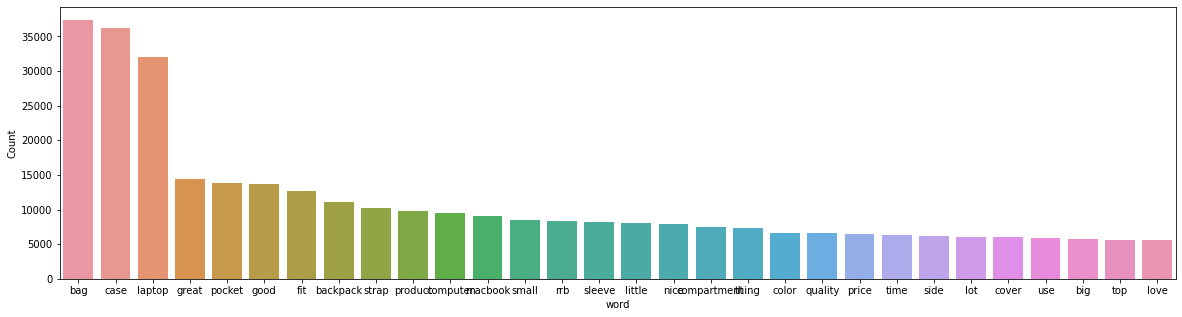

In [123]:
freq_words(bags_and_cases['reviews'])

In [124]:
bags_and_cases.to_csv('bags_and_cases_processed.csv')

In [125]:
bags_and_cases

,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count
0,B00001OPGT-0000,2,case nice plenty pocket stuff office thin laptop enough padding protect computer rubbing son fall thin laptop constant rubbing screen touchpad control little white mark blame computer design paddi...,76,0,0,0,0,37
1,B00001OPGT-0001,3,month toshiba laptop case strong thou side bag strong sturdy compact thinking file document case laptop bag pro strong good quality fabric zipper water proof right size smart toocon laptop book bi...,44,0,0,0,1,36
2,B00001OPGT-0002,3,pic product justice real thing good black synthetic sheen huge contraption people hand shoulder strap delicious padding adequate space large computer zip drive cable magazine note bulky file text ...,26,0,0,0,5,33
3,B00001OPGT-0003,4,pavilion rrb thing laptop front pocket fit power supply infrared mouse infrared transmitter headphone fine large pocket use store cdrom inside pocket large enough hold box business card heache sid...,38,0,0,0,9,40
4,B00001OPGT-0004,4,happy bag expectation satellite adjustable padding secure notebook accomodate thick laptop thin bag enough compartment big exterior one interior one mouse power supply great value,32,0,0,0,3,25
...,...,...,...,...,...,...,...,...,...
42627,B00JO6UGFU-0004,4,great cheap fit macbook air perfect amount pocket ipad product long enough durability happy product,28,1,1,0,5,15
42628,B00JO6UGFU-0005,4,love case stylish protective perfect love fit backpack nice padding gray suede macbook air inch case,20,0,0,0,5,16
42629,B00JO6UGFU-0006,4,write review variety tech company due work school schedule able review product couple year new macbook air sleeve bag work school sleeve herschel company inateck effort perfect sleeve carrying cas...,361,3,3,0,27,224
42630,B00JO6UGFU-0007,4,name envelop cover case fit macbook air mini laptop case sturdy soft thick heather grey leather uniform strong patch leather bottom slip main compartment smooth soft flannel prevent content divide...,87,1,1,0,5,80


In [126]:
!pip3 install -q wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [127]:
text_for_cloud = " ".join(word for word in bags_and_cases.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 7506938 words in the combination of all reviews.


In [ ]:
from matplotlib.pyplot import figure

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [129]:
freq_of_words = pd.Series(' '.join(bags_and_cases['reviews']).split()).value_counts()[:40]
freq_of_words

bag            37361
case           36184
laptop         32020
great          14434
pocket         13812
good           13627
fit            12732
backpack       11049
strap          10269
product         9722
computer        9492
macbook         9031
small           8480
rrb             8296
sleeve          8138
little          8120
nice            7956
compartment     7540
thing           7308
color           6678
quality         6625
price           6456
time            6359
side            6157
lot             6104
cover           6065
use             5865
big             5801
top             5651
love            5598
room            5526
inch            5424
zipper          5379
item            5353
perfect         5349
bottom          5183
large           4936
shoulder        4895
new             4645
work            4395
dtype: int64